In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing


In [5]:
data1=pd.read_csv('bank-full.csv',sep=';')
data1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data2=pd.get_dummies(data1,columns=['job','marital','education','contact','poutcome'])
data2.head(10)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
5,35,no,231,yes,no,5,may,139,1,-1,...,0,1,0,0,0,1,0,0,0,1
6,28,no,447,yes,yes,5,may,217,1,-1,...,0,1,0,0,0,1,0,0,0,1
7,42,yes,2,yes,no,5,may,380,1,-1,...,0,1,0,0,0,1,0,0,0,1
8,58,no,121,yes,no,5,may,50,1,-1,...,0,0,0,0,0,1,0,0,0,1
9,43,no,593,yes,no,5,may,55,1,-1,...,1,0,0,0,0,1,0,0,0,1


In [8]:
data2['default'] = np.where(data2['default'].str.contains("yes"), 1, 0)
data2['housing'] = np.where(data2['housing'].str.contains("yes"), 1, 0)
data2['loan'] = np.where(data2['loan'].str.contains("yes"), 1, 0)
data2['y'] = np.where(data2['y'].str.contains("yes"), 1, 0)
data2.head(10)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
5,35,0,231,1,0,5,may,139,1,-1,...,0,1,0,0,0,1,0,0,0,1
6,28,0,447,1,1,5,may,217,1,-1,...,0,1,0,0,0,1,0,0,0,1
7,42,1,2,1,0,5,may,380,1,-1,...,0,1,0,0,0,1,0,0,0,1
8,58,0,121,1,0,5,may,50,1,-1,...,0,0,0,0,0,1,0,0,0,1
9,43,0,593,1,0,5,may,55,1,-1,...,1,0,0,0,0,1,0,0,0,1


In [9]:
data2['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [10]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}


In [11]:
data2=data2.replace(order)


In [12]:
data2.head(10)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
5,35,0,231,1,0,5,5,139,1,-1,...,0,1,0,0,0,1,0,0,0,1
6,28,0,447,1,1,5,5,217,1,-1,...,0,1,0,0,0,1,0,0,0,1
7,42,1,2,1,0,5,5,380,1,-1,...,0,1,0,0,0,1,0,0,0,1
8,58,0,121,1,0,5,5,50,1,-1,...,0,0,0,0,0,1,0,0,0,1
9,43,0,593,1,0,5,5,55,1,-1,...,1,0,0,0,0,1,0,0,0,1


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

In [14]:
x=pd.concat([data2.iloc[:,0:11],data2.iloc[:,12:]],axis=1)
y=data2.iloc[:,11]

In [15]:
x.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [17]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X = max_abs_scaler.fit_transform(x)

In [18]:
X

array([[6.10526316e-01, 0.00000000e+00, 2.09836772e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.63157895e-01, 0.00000000e+00, 2.83960167e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.47368421e-01, 0.00000000e+00, 1.95834598e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [7.57894737e-01, 0.00000000e+00, 5.59597364e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.00000000e-01, 0.00000000e+00, 6.54087558e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.89473684e-01, 0.00000000e+00, 2.90912295e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [19]:
classifier=LogisticRegression(solver='lbfgs',max_iter=500)
classifier.fit(X,y)

LogisticRegression(max_iter=500)

In [20]:
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df.head()

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [22]:
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39071,   851],
       [ 3672,  1617]])

In [23]:
(39107+1282)/(39107+815+4007+1282)

0.8933445400455642

In [24]:
classifier.predict_proba(X)[:,1] 

array([0.02836813, 0.01867772, 0.00490109, ..., 0.98330491, 0.16074406,
       0.18902837])

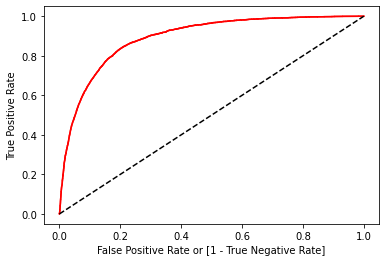

auc accuracy: 0.6422061519679768


In [25]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)